# Fake News Detection

Dans ce projet, nous avons expliqué en détail la détection des fausses nouvelles.

Nous avons choisi un exemple d'ensemble de données pour les Fake News et concrétisé le sujet que nous avons expliqué sur un exemple réel.

Nous avons utilisé le langage Python ainsi que des algorithmes d'apprentissage automatique (Machine Learning) tels que SVM et k-NN pour classifier les faux et les vrais articles de presse. Nous avons exploité un ensemble de bibliothèques Python comme scikit-learn, et pour la détection, nous avons utilisé un modèle de langage naturel (LLM).

<center><h1><div class="top_section">Table des matières</div></h1></center>

1.  **[Démarrage](#demerrage)**
2.  **[Exigences](#exigences)**
3.  **[Dataset](#dataset)**
4.  **[Github](#github)**
5.  **[Schéma](#schema)**

<a id="demerrage"></a>
<strong><h2>Démarrage</h2></strong>

Ces instructions vous permettront d'obtenir une copie du projet opérationnel sur votre ordinateur local à des fins de développement et de test.

<a id="exigences"></a>
<strong><h2>Exigences</h2></strong>

1. Python 3.12.0
    * Cette configuration nécessite que Python 3.12.0 soit installé sur votre machine. vous pouvez vous référer à cette URL https://www.python.org/downloads/ pour télécharger python. Une fois Python téléchargé et installé, vous devrez configurer les variables PATH (si vous souhaitez exécuter le programme Python directement, les instructions détaillées sont ci-dessous dans la section Comment exécuter le logiciel).
    
    * Pour ce faire, vérifiez ceci : https://www.pythoncentral.io/add-python-to-path-python-is-not-recognized-as-an-internal-or-external-command/.
    
2. La deuxième option, la plus simple, consiste à télécharger anaconda et à utiliser son invite anaconda pour exécuter les commandes. Pour installer anaconda, vérifiez cette URL https://www.anaconda.com/download/

3. Vous devrez également télécharger et installer les 3 packages ci-dessous après avoir installé Python ou Anaconda à partir des étapes ci-dessus.

    * Sklearn (scikit-learn)
    * numpy
    * seaborn
    * worldcloud
    * pandas

* Si vous avez choisi d'installer python 3.12.0, exécutez les commandes ci-dessous dans l'invite de commande/le terminal pour installer ces packages.


```bash
    pip install -U scikit-learn
    pip install numpy
    pip install wordcloud
    pip install seaborn
    pip install pandas
```

* Si vous avez choisi d'installer anaconda, exécutez les commandes ci-dessous dans l'invite anaconda pour installer ces packages

```bash
    conda install -c scikit-learn
    conda install -c anaconda numpy
    conda install -c anaconda wordcloud
    conda install -c anaconda seaborn
    conda install -c anaconda pandas
```

<a id="dataset"></a>
<strong><h2>Dataset</h2></strong>

* Les données proviennent de Kaggle, vous pouvez les télécharger ici :
Référence - https://www.kaggle.com/code/therealsampat/fake-news-detection/input

Il existe deux fichiers, un pour les vraies nouvelles et un pour les fausses nouvelles (tous deux en anglais) avec un total de 17 903 « faux » tweets et 20 826 « vrais » articles.

<a id="github"></a>
<strong><h2>Github</h2></strong>

* Voici le lien Github : https://github.com/Furkan9528/Fake-New-Detection

<a id="schema"></a>
<strong><h2>Schéma</h2></strong>

<img src="https://raw.githubusercontent.com/Furkan9528/Fake-News-Detection/main/schema.png?token=GHSAT0AAAAAACJWILNP3ZGSRFMEQGGXHVLAZNVEITA" width="600">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Importation d'un ensemble de données

In [2]:
dataframe_fake = pd.read_csv("Fake.csv", nrows=6500)
dataframe_true = pd.read_csv("True.csv", nrows=6500)

In [3]:
dataframe_fake.iloc[14:,:8]

,title,text,subject,date
14,Heiress To Disney Empire Knows GOP Scammed Us...,Abigail Disney is an heiress with brass ovarie...,News,"December 20, 2017"
15,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,News,"December 20, 2017"
16,The Internet Brutally Mocks Disney’s New Trum...,A new animatronic figure in the Hall of Presid...,News,"December 19, 2017"
17,Mueller Spokesman Just F-cked Up Donald Trump...,Trump supporters and the so-called president s...,News,"December 17, 2017"
18,SNL Hilariously Mocks Accused Child Molester ...,"Right now, the whole world is looking at the s...",News,"December 17, 2017"
...,...,...,...,...
6495,Watch Dan Savage Destroy Ann Coulter For Her ...,Ann Coulter is one of those blatantly offensiv...,News,"May 7, 2016"
6496,Judge Lets Trump Postpone His Fraud Case Unti...,"Thanks to an absurd legal ruling, Donald Trump...",News,"May 7, 2016"
6497,Alabama’s Homophobic Chief Justice Roy Moore ...,Alabama Chief Justice Roy Moore is finally fac...,News,"May 7, 2016"
6498,American Airlines Throws Ivy League Economist...,Ivy League economist Guido Menzio has reported...,News,"May 7, 2016"


In [4]:
dataframe_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Insertion d'une colonne "classe" comme fonctionnalité cible

In [5]:
dataframe_fake["class"] = 0
dataframe_true["class"] = 1

In [6]:
dataframe_fake.shape, dataframe_true.shape

((6500, 5), (6500, 5))

# Combiner des Dataframes "Vrai" et "Faux"

In [7]:
dataframe_merge = pd.concat([dataframe_fake, dataframe_true], axis =0 )
dataframe_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
dataframe_merge.shape

(13000, 5)

In [9]:
dataframe_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

# Wordcloud

In [10]:
from IPython.display import set_matplotlib_formats
import matplotlib
from wordcloud import WordCloud

In [11]:
# Concaténation du texte de tous les articles
all_text = ' '.join(dataframe_merge['text'])

In [12]:
# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

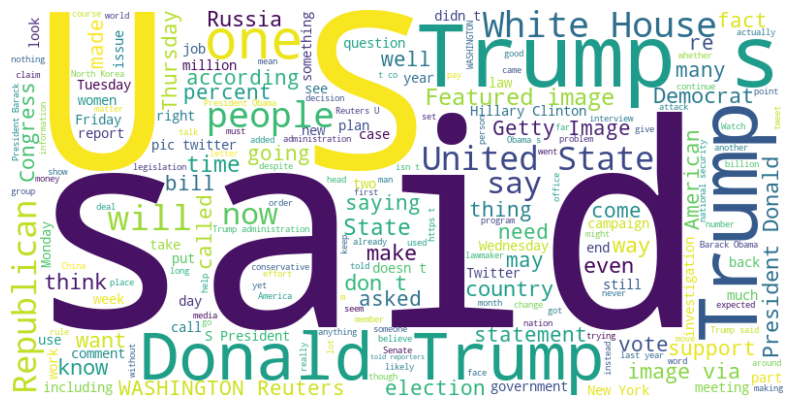

In [13]:
# Affichage du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Supprimer les colonnes inutiles

In [14]:
dataframe = dataframe_merge.drop(["title", "subject","date"], axis = 1)

In [15]:
dataframe.isnull().sum()

text     0
class    0
dtype: int64

# Mélange aléatoire de la DataFrame

In [16]:
dataframe = dataframe.sample(frac = 1)

In [17]:
dataframe.head()

,text,class
3805,WASHINGTON (Reuters) - The Department of Justi...,1
5171,"Last week, RABA Research had Hillary Clinton b...",0
5427,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",1
220,Donald Trump has recently come under fire for ...,0
5769,As Obamacare continues to survive court challe...,0


In [18]:
dataframe.reset_index(inplace = True)
dataframe.drop(["index"], axis = 1, inplace = True)

In [19]:
dataframe.columns

Index(['text', 'class'], dtype='object')

In [20]:
dataframe.head()

,text,class
0,WASHINGTON (Reuters) - The Department of Justi...,1
1,"Last week, RABA Research had Hillary Clinton b...",0
2,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",1
3,Donald Trump has recently come under fire for ...,0
4,As Obamacare continues to survive court challe...,0


# Créer une fonction pour traiter les textes

In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    text = re.sub('@', ' ', text)
    return text

In [22]:
dataframe["text"] = dataframe["text"].apply(wordopt)

In [23]:
dataframe.head()

,text,class
0,washington reuters the department of justi...,1
1,last week raba research had hillary clinton b...,0
2,ramallah west bank reuters palestinian pr...,1
3,donald trump has recently come under fire for ...,0
4,as obamacare continues to survive court challe...,0


# Définir des variables dépendantes et indépendantes

In [24]:
x = dataframe["text"]
y = dataframe["class"]

# Séparation de la Training et des tests

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Convertir du texte en vecteurs

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train);
xv_test = vectorization.transform(x_test)

feature_names = vectorization.get_feature_names_out()

print("Score et mots TF_IDF: \n")
for col in xv_train.nonzero()[1][:50]:
    print(f"{feature_names[col].ljust(15)}: {xv_train[0, col]}")

Score et mots TF_IDF: 

criticized     : 0.04009317814934928
democrats      : 0.02889340592605351
advocates      : 0.05003557992610087
rights         : 0.03506587514367382
reproductive   : 0.06630614577398473
move           : 0.032900877823288176
praised        : 0.04738110150466483
republicans    : 0.024520181266973147
congressional  : 0.03330494944389703
activists      : 0.05193732602255573
christian      : 0.04785213759239809
conservative   : 0.034068364021727776
payment        : 0.05976990771966589
co             : 0.03279761252695153
no             : 0.018998419268747933
law            : 0.026408763346169605
exemption      : 0.06561003375669913
objections     : 0.06414795258001978
lodge          : 0.08663421910183003
let            : 0.03234976385338094
will           : 0.016799246621897943
known          : 0.0333147656592469
popularly      : 0.06705262153823148
act            : 0.03214606763120346
care           : 0.03321702108730384
affordable     : 0.042881088249137014
part    

# KNN Algorithme

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


KNN = KNeighborsClassifier()
KNN.fit(xv_train, y_train)

KNeighborsClassifier()

In [28]:
pred_knn = KNN.predict(xv_test)

In [29]:
KNN.score(xv_test, y_test)

0.8612307692307692

In [30]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1629
           1       0.80      0.96      0.87      1621

    accuracy                           0.86      3250
   macro avg       0.88      0.86      0.86      3250
weighted avg       0.88      0.86      0.86      3250



# SVM Algorithme

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM = SVC(kernel='rbf')
SVM.fit(xv_train, y_train)

SVC()

In [32]:
pred_svm = SVM.predict(xv_test)

In [33]:
SVM.score(xv_test, y_test)

0.9969230769230769

In [34]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00      1621

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



In [35]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_KNN = KNN.predict(new_xv_test)
    pred_SVM = SVM.predict(new_xv_test)

    return print("\n\nSVM Prediction: {} \nKNN Prediction: {} ".format(output_label(pred_SVM[0]),output_label(pred_KNN[0])))

In [36]:
news = str(input())
manual_testing(news)

Media Links Domestic Drone Surveillance to Trump with ZERO Evidence 21st Century Wire says This is why nobody takes the mainstream media seriously Foreign Policy has released a new article hyping up the dangers of mass surveillance specifically talking about the relatively unknown National Geospatial Intelligence Agency It talks of the potential for drones to be able to track the movements of every person in a city and 90 of the article is solely concerned with generating fear Then in literally the final two paragraphs the author links the fear and problems which they have just spent the previous twelve paragraphs hyping up saying that Trump could use these systems against  innocent American citizens This is not journalism Stuart J Hooper examines the propaganda piece in the following video and also discusses which candidate Foreign Policy supported during the election Can you guess who it was READ MORE TRUMP NEWS AT 21st Century Wire Trump FilesSUPPORT 21WIRE  SUBSCRIBE BECOME A MEMBE

In [37]:
response_pred = None
def output_label(n):
    global response_pred
    if n == 0:
        response_pred = "This text is Fake News"
        return response_pred
    elif n == 1:
        response_pred = "This text is not a Fake News"
        return response_pred
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_SVM = SVM.predict(new_xv_test)
    return print("\n\n"'{} '"".format(output_label(pred_SVM[0])))

news = str(input())
manual_testing(news)

Media Links Domestic Drone Surveillance to Trump with ZERO Evidence 21st Century Wire says This is why nobody takes the mainstream media seriously Foreign Policy has released a new article hyping up the dangers of mass surveillance specifically talking about the relatively unknown National Geospatial Intelligence Agency It talks of the potential for drones to be able to track the movements of every person in a city and 90 of the article is solely concerned with generating fear Then in literally the final two paragraphs the author links the fear and problems which they have just spent the previous twelve paragraphs hyping up saying that Trump could use these systems against  innocent American citizens This is not journalism Stuart J Hooper examines the propaganda piece in the following video and also discusses which candidate Foreign Policy supported during the election Can you guess who it was READ MORE TRUMP NEWS AT 21st Century Wire Trump FilesSUPPORT 21WIRE  SUBSCRIBE BECOME A MEMBE

# LLM

In [38]:
import openai

API_KEY = open("API_KEY","r").read()
openai.api_key = API_KEY

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role":"user","content": news + response_pred + "because"}
    ]
)

assistant_response = response_pred + " because " + response['choices'][0]['message']['content']
print(assistant_response)

This text is Fake News because it lacks evidence to support its claims and presents speculation as fact. The article discusses a Foreign Policy article that supposedly links domestic drone surveillance to Trump, but provides no evidence or specific examples to back up this claim. It also criticizes the mainstream media for generating fear and accuses Foreign Policy of being biased by supporting a particular candidate during the election without providing any evidence to support this accusation. Therefore, the text is not credible and should be regarded as fake news.
